In [123]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [124]:
knn=KMeans(n_clusters=10)

In [125]:
data=pd.read_csv('training.csv',sep=';')
data['Year']=data['Date'].apply(lambda x: x[:4])

/home/vlad333rrty/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
group=data.groupby(['Year','Location'],as_index=False)
res=group.describe()[[('MinTemp','mean'),('MaxTemp','mean'),('Rainfall','mean'),('Humidity9am','mean'),('Humidity3pm','mean')]]
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm
,mean,mean,mean,mean,mean
0,12.545902,25.086885,3.219672,69.557377,45.786885
1,13.680000,27.383333,1.862069,55.666667,33.566667
2,8.770968,21.377419,2.690323,70.677419,46.935484
3,11.035484,25.254839,1.825806,57.387097,31.709677
4,14.715934,24.993989,3.334066,61.000000,52.175824
...,...,...,...,...,...
215,8.557914,21.036331,1.696403,71.625899,46.902878
216,9.396296,19.792593,1.330405,81.841751,55.151515
217,12.827368,24.143158,4.606275,70.694737,53.038732


In [127]:
res.fillna(0,inplace=True)

In [128]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaler.fit(res)
scaled_res= scaler.transform(res)
for_training=pd.DataFrame(scaled_res)

In [129]:
knn.fit(for_training)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1, perplexity=30)
tsne_repr=tsne.fit_transform(scaled_res)

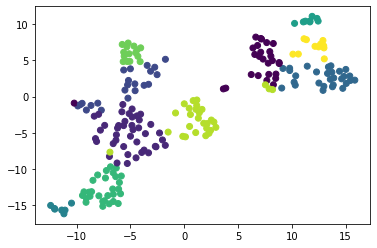

In [131]:
import matplotlib.pyplot as plt
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = knn.labels_, cmap = 'viridis')

# AgglomerativeClustering

In [132]:
from sklearn.cluster import AgglomerativeClustering as AGC

agc = AGC(n_clusters=10, affinity='euclidean', linkage='ward')
agc.fit(scaled_res)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

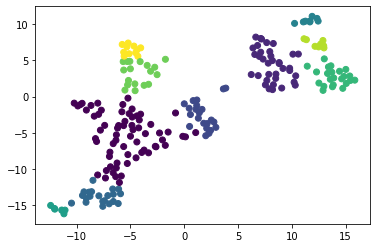

In [133]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = agc.labels_, cmap = 'viridis')

In [134]:
res['label']=agc.labels_

In [135]:
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,label
,mean,mean,mean,mean,mean,
0,12.545902,25.086885,3.219672,69.557377,45.786885,1
1,13.680000,27.383333,1.862069,55.666667,33.566667,9
2,8.770968,21.377419,2.690323,70.677419,46.935484,0
3,11.035484,25.254839,1.825806,57.387097,31.709677,9
4,14.715934,24.993989,3.334066,61.000000,52.175824,1
...,...,...,...,...,...,...
215,8.557914,21.036331,1.696403,71.625899,46.902878,0
216,9.396296,19.792593,1.330405,81.841751,55.151515,0
217,12.827368,24.143158,4.606275,70.694737,53.038732,1


In [137]:
group=data.groupby(['Year','Location'])

In [139]:
group.describe()

MinTemp                                                   \
                   count       mean       std  min     25%    50%     75%   
Year Location                                                               
2007 Canberra       61.0  12.545902  3.002309  6.1  10.100  12.80  15.000   
2008 Albury         30.0  13.680000  3.427415  7.4  11.625  13.40  15.900   
     Ballarat       31.0   8.770968  3.176811  2.9   6.750   8.80  10.400   
     Bendigo        31.0  11.035484  3.052600  6.2   8.550  10.80  13.250   
     Brisbane      182.0  14.715934  4.874482  3.7  11.450  14.85  18.575   
...                  ...        ...       ...  ...     ...    ...     ...   
2015 WaggaWagga    278.0   8.557914  6.590190 -3.6   3.100   7.60  13.350   
     Watsonia      297.0   9.396296  4.467324 -2.1   5.900   9.30  12.200   
     Williamtown   285.0  12.827368  4.980796  1.4   8.900  13.10  17.100   
     Wollongong    291.0  14.459794  4.165755  6.1  11.050  14.30  18.000   
2016 Nhil          226.0  10.006637  5.024067 -0.4   6.125   9.85  13.675   

                       MaxTemp             ... Temp3pm       RISK_MM  \
                   max   count       mean  ...     75%   max   count   
Year Location                              ...                         
2007 Canberra     19.9    61.0  25.086885  ...  27.300  34.3    61.0   
2008 Albury       20.5    30.0  27.383333  ...  29.525  33.0    30.0   
     Ballarat     18.8    31.0  21.377419  ...  22.750  30.2    31.0   
     Bendigo      17.5    31.0  25.254839  ...  26.500  34.4    31.0   
     Brisbane     24.5   183.0  24.993989  ...  26.550  33.7   183.0   
...                ...     ...        ...  ...     ...   ...     ...   
2015 WaggaWagga   23.4   278.0  21.036331  ...  26.600  37.5   278.0   
     Watsonia     21.6   297.0  19.792593  ...  22.600  38.4   297.0   
     Williamtown  22.8   285.0  24.143158  ...  26.400  41.0   285.0   
     Wollongong   22.3   291.0  20.826117  ...  22.500  33.4   291.0   
2016 Nhil         22.5   226.0  22.212832  ...  26.600  40.1   226.0   

                                                                   
                      mean        std  min  25%  50%   75%    max  
Year Location                                                      
2007 Canberra     3.219672   7.337820  0.0  0.0  0.0  3.40   39.8  
2008 Albury       1.780000   4.417005  0.0  0.0  0.0  0.95   16.8  
     Ballarat     2.593548   9.705460  0.0  0.0  0.2  0.90   53.6  
     Bendigo      1.825806   5.724274  0.0  0.0  0.0  0.20   30.4  
     Brisbane     3.318033  10.122114  0.0  0.0  0.0  0.80   79.4  
...                    ...        ...  ...  ...  ...   ...    ...  
2015 WaggaWagga   1.696403   5.148585  0.0  0.0  0.0  0.20   34.0  
     Watsonia     1.327273   3.307337  0.0  0.0  0.0  0.80   26.6  
     Williamtown  4.635789  14.904786  0.0  0.0  0.0  1.80  156.0  
     Wollongong   4.083162  14.963674  0.0  0.0  0.0  1.60  192.0  
2016 Nhil         1.103540   2.828692  0.0  0.0  0.0  0.40   24.4  

[220 rows x 120 columns]

In [142]:
df=pd.DataFrame(group.size().reset_index(name = "Group_Count"))
df['label']=agc.labels_

In [143]:
df

,Year,Location,Group_Count,label
0,2007,Canberra,61,1
1,2008,Albury,30,9
2,2008,Ballarat,31,0
3,2008,Bendigo,31,9
4,2008,Brisbane,183,1
...,...,...,...,...
215,2015,WaggaWagga,278,0
216,2015,Watsonia,297,0
217,2015,Williamtown,285,1
218,2015,Wollongong,291,6


In [144]:
group=df.groupby('label')
group.describe()

Group_Count                                                             
            count        mean         std    min     25%    50%     75%    max
label                                                                         
0            66.0  326.863636   54.789636   31.0  327.75  335.0  364.00  366.0
1            36.0  317.055556   62.011033   61.0  297.00  335.0  361.25  365.0
2            22.0  307.681818   91.841679   29.0  323.00  333.0  352.00  363.0
3            21.0  321.857143   70.312364   31.0  329.00  335.0  363.00  365.0
4             8.0  298.625000  113.382964   31.0  315.50  336.0  362.75  365.0
5             7.0  327.714286   22.440397  291.0  319.00  326.0  338.50  362.0
6            23.0  323.478261   68.483488   29.0  332.00  335.0  352.50  365.0
7            18.0  326.055556   79.514314   31.0  333.50  350.5  365.00  365.0
8             8.0  329.750000   38.688315  259.0  321.00  335.5  361.75  365.0
9            11.0  281.363636  125.966085   30.0  303.50  332.0  350.50  365.0

In [146]:
df[(df['Location']=='Albury')]

,Year,Location,Group_Count,label
1,2008,Albury,30,9
14,2009,Albury,364,7
43,2010,Albury,358,0
72,2011,Albury,330,0
101,2012,Albury,334,0
130,2013,Albury,333,0
160,2014,Albury,360,0
190,2015,Albury,298,0


In [147]:
df[(df['Location']=='Canberra')]

,Year,Location,Group_Count,label
0,2007,Canberra,61,1
6,2008,Canberra,366,0
20,2009,Canberra,365,0
49,2010,Canberra,364,0
78,2011,Canberra,327,0
107,2012,Canberra,334,0
136,2013,Canberra,337,0
166,2014,Canberra,363,0
196,2015,Canberra,216,0


In [148]:
df[(df['Location']=='WaggaWagga')]

,Year,Location,Group_Count,label
39,2009,WaggaWagga,365,7
68,2010,WaggaWagga,365,0
97,2011,WaggaWagga,335,0
126,2012,WaggaWagga,335,0
156,2013,WaggaWagga,337,7
186,2014,WaggaWagga,365,7
215,2015,WaggaWagga,278,0


In [149]:
df[(df['Location']=='Ballarat')]

,Year,Location,Group_Count,label
2,2008,Ballarat,31,0
16,2009,Ballarat,365,0
45,2010,Ballarat,364,3
74,2011,Ballarat,329,3
103,2012,Ballarat,335,3
132,2013,Ballarat,336,3
162,2014,Ballarat,363,0
192,2015,Ballarat,298,3


In [150]:
df[(df['Location']=='Bendigo')]

,Year,Location,Group_Count,label
3,2008,Bendigo,31,9
17,2009,Bendigo,365,7
46,2010,Bendigo,365,0
75,2011,Bendigo,335,0
104,2012,Bendigo,335,0
133,2013,Bendigo,337,0
163,2014,Bendigo,365,0
193,2015,Bendigo,293,0


In [151]:
df[(df['Location']=='Brisbane')]

,Year,Location,Group_Count,label
4,2008,Brisbane,183,1
18,2009,Brisbane,362,1
47,2010,Brisbane,361,8
76,2011,Brisbane,331,1
105,2012,Brisbane,334,1
134,2013,Brisbane,336,1
164,2014,Brisbane,362,1
194,2015,Brisbane,259,8
